In [3]:
import numpy as np
import matplotlib.pyplot as plt
import random 

In [4]:
x1 = np.random.randn(20)
x2 = np.random.randn(20)

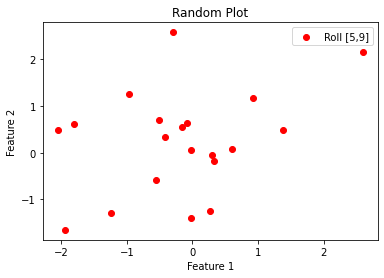

In [52]:
visualize_data(x1,x2)

In [23]:
d = np.random.rand(2,2)
x = [x1,x2]
x = np.array(x).T
print(x)

[[-2.04618752  0.49261962]
 [ 0.27091058 -1.24588018]
 [ 2.5914911   2.14429971]
 [ 0.92495407  1.16717066]
 [-1.23438834 -1.28741106]
 [ 1.37533647  0.49011887]
 [-0.55722342 -0.57600127]
 [-0.15704268  0.55243192]
 [-1.80655371  0.61716008]
 [ 0.29392627 -0.04034571]
 [-0.0193753   0.0523576 ]
 [-0.29863981  2.57514993]
 [-1.94231437 -1.65078544]
 [ 0.60504784  0.08947485]
 [-0.50875056  0.6959538 ]
 [-0.42527975  0.33815956]
 [-0.02446472 -1.40620129]
 [-0.07760506  0.63632343]
 [ 0.32141669 -0.17844568]
 [-0.96696407  1.26411157]]


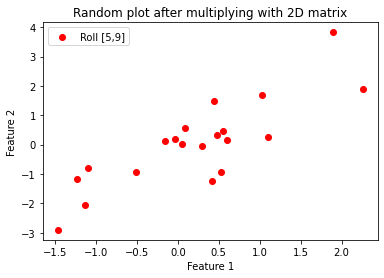

In [60]:
new_x = np.matmul(x, d)
visualize_data(new_x[:,0], new_x[:,1], 'Random plot after multiplying with 2D matrix')

In [43]:
cov, eigenvalues, eigenvectors,  = calculate_cov_eig(new_x)

Covariance Matrix: [[0.95705184 1.20457014]
 [1.20457014 2.20603281]]
 Eigen Values: [0.22471604 2.93836862]
 Eigen Vectors: [[-0.85447593 -0.51949098]
 [ 0.51949098 -0.85447593]]


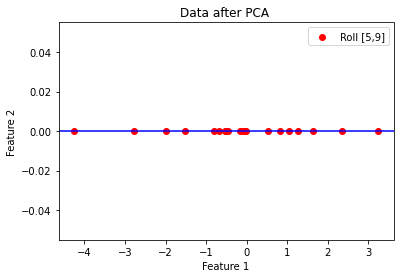

In [56]:
data = apply_pca(eigenvectors[:,1] , new_x)
visualize_data(data, np.zeros_like(data), 'Data after PCA ')

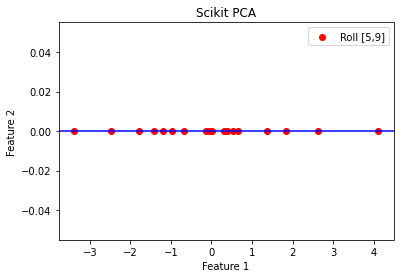

In [58]:
#use of skleannr 
from sklearn.decomposition import PCA

# Assume you have a dataset called `data` with dimensions (m, n)

# Create an instance of PCA with the desired number of components
n_components = 1  # Specify the number of principal components you want to retain
pca = PCA(n_components=n_components)

# Fit the PCA model to the data
pca.fit(new_x)

# Transform the data to the lower-dimensional space
transformed_data = pca.transform(new_x)

# Access the explained variance ratio
visualize_data(transformed_data, np.zeros_like(transformed_data), 'Scikit PCA')

In [59]:
def visualize_data(x,y, title='Random Plot', target=[0], label =['Feature 1', 'Feature 2']):
    colormap = np.array(['r', 'g', 'b'])
    plt.scatter(x,y, c= colormap[target])
    plt.title(title)
    plt.xlabel(label[0])
    plt.ylabel(label[1])
#     plt.axhline(0, color='b')
    # Add a legend with roll numbers
    plt.legend([f'Roll [5,9]'])
    plt.show()

def calculate_cov_eig(new_x):
    cov_mat = np.cov(new_x.T)
    eigenvalues, eigenvectors = np.linalg.eig(cov_mat)
    print(f'Covariance Matrix: {cov_mat}\n Eigen Values: {eigenvalues}\n Eigen Vectors: {eigenvectors}')
    return cov_mat,  eigenvalues, eigenvectors

def apply_pca(eigen_row, x):
    pca_data = np.matmul(eigen_row, x.T)
    pca_data= pca_data.T
    return pca_data